In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
import pandas as pd

file_path = r"C:\Users\ASUS\Downloads\ProductPriceIndex.csv"
df = pd.read_csv(file_path, delimiter=';')

price_columns = ['farmprice', 'atlantaretail', 'chicagoretail', 'losangelesretail', 'newyorkretail', 'averagespread']

for column in price_columns:
    if column != 'averagespread':
        df[column] = pd.to_numeric(df[column].replace('[\$,]', '', regex=True), errors='coerce')
    else:
        df[column] = pd.to_numeric(df[column].replace('[\%,]', '', regex=True), errors='coerce')

df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
print(df.head())


        productname       date  farmprice  atlantaretail  chicagoretail  \
0      Strawberries 2019-05-19       1.16           2.23           1.70   
1   Romaine Lettuce 2019-05-19       0.35           1.72           2.00   
2  Red Leaf Lettuce 2019-05-19       0.32           1.84           1.84   
3          Potatoes 2019-05-19       1.50           5.32           5.14   
4           Oranges 2019-05-19       0.41           1.42           1.45   

   losangelesretail  newyorkretail  averagespread  
0              1.99           2.54          82.33  
1              1.69           1.99         428.57  
2              1.69           1.89         467.19  
3              3.99           6.22         244.50  
4              1.34           2.05         281.71  


In [23]:
df

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
0,Strawberries,2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33
1,Romaine Lettuce,2019-05-19,0.35,1.72,2.00,1.69,1.99,428.57
2,Red Leaf Lettuce,2019-05-19,0.32,1.84,1.84,1.69,1.89,467.19
3,Potatoes,2019-05-19,1.50,5.32,5.14,3.99,6.22,244.50
4,Oranges,2019-05-19,0.41,1.42,1.45,1.34,2.05,281.71
...,...,...,...,...,...,...,...,...
15761,Broccoli Crowns,1999-10-24,0.29,1.46,0.00,0.97,1.15,208.62
15762,Broccoli Bunches,1999-10-24,0.23,1.21,0.00,0.84,1.10,242.39
15763,Cauliflower,1999-10-24,0.19,1.01,0.00,0.75,0.92,252.63
15764,Carrots,1999-10-24,0.12,0.64,0.00,0.84,0.59,331.25


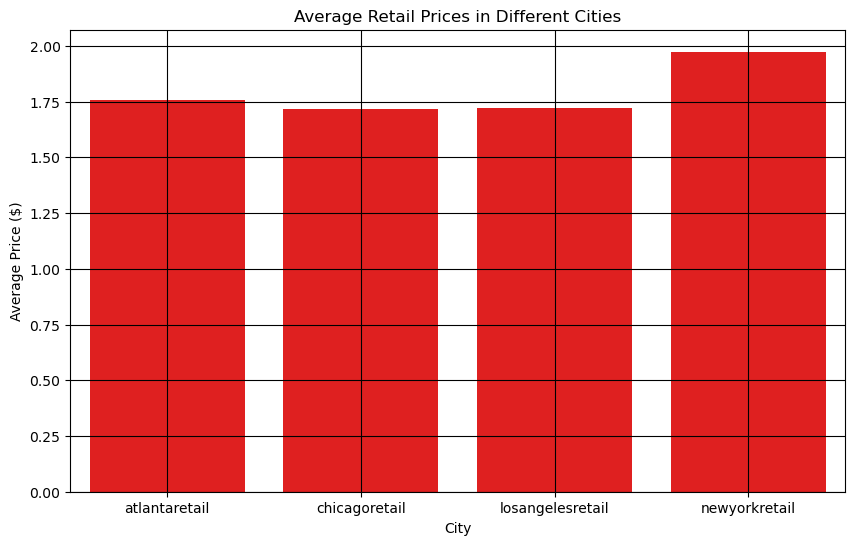

In [11]:
cities = ["atlantaretail","chicagoretail","losangelesretail","newyorkretail"]
avg_city_prices = df[cities].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_city_prices.index,y=avg_city_prices.values,color = "red")
plt.grid(color = "black")
plt.title('Average Retail Prices in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Price ($)')
plt.show()

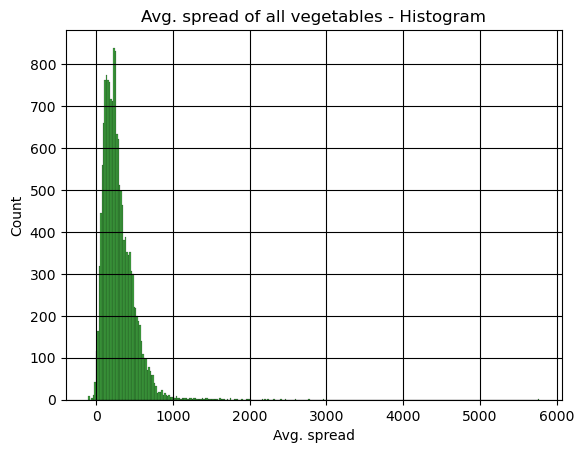

In [12]:
##avg spread 
hist_avg = sns.histplot(data=df, x="averagespread",color="green");
hist_avg.set(title="Avg. spread of all vegetables - Histogram", xlabel = "Avg. spread");
plt.grid(color = "black")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


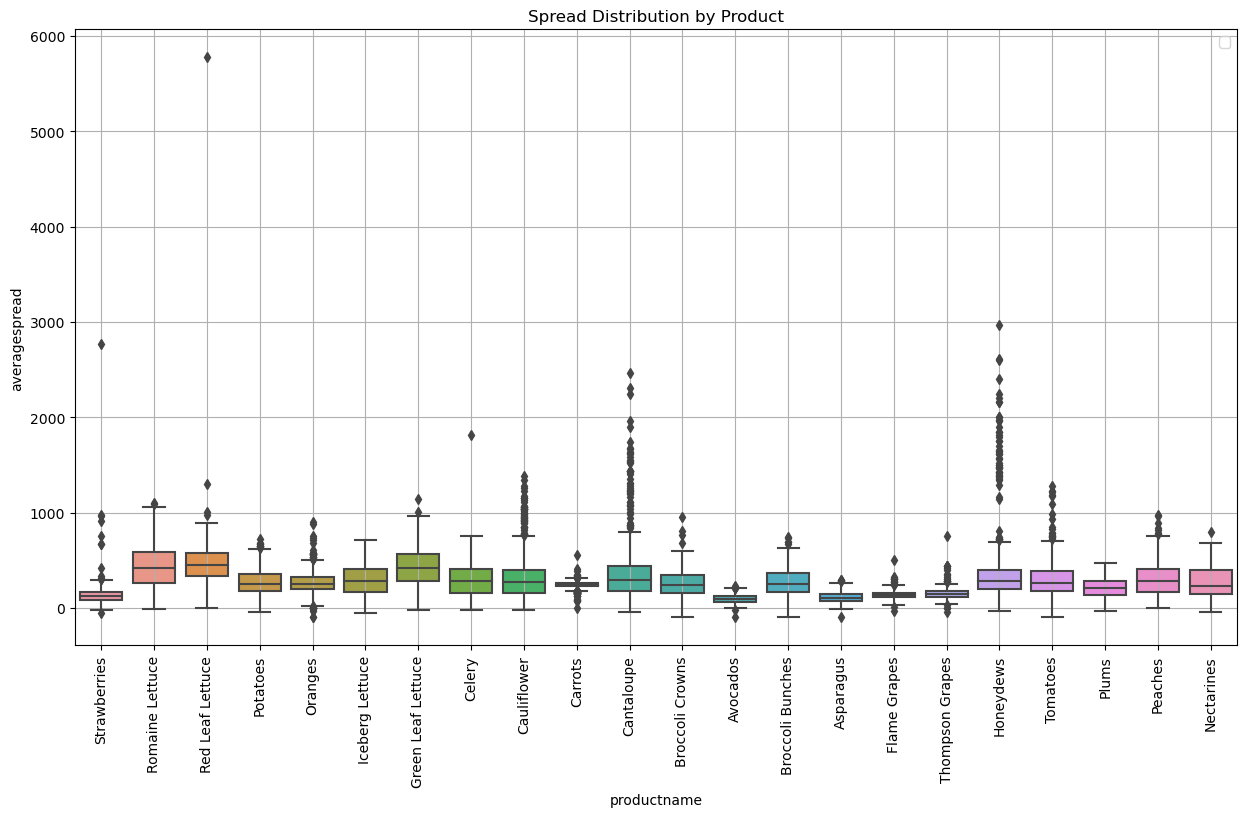

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x='productname',y='averagespread',data=df)
plt.xticks(rotation=90)
plt.title('Spread Distribution by Product')
plt.grid()
plt.legend()
plt.show()

In [14]:
df[df["averagespread"] > 756.5789].sort_values(by="averagespread", ascending=True)

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
7155,Romaine Lettuce,2010-03-28,0.19,1.40,2.03,1.34,1.74,756.58
14468,Green Leaf Lettuce,2001-06-24,0.15,1.16,1.34,1.07,1.57,756.67
6935,Romaine Lettuce,2010-07-04,0.18,1.40,2.03,1.20,1.54,756.94
10930,Green Leaf Lettuce,2005-09-18,0.17,1.24,1.84,1.01,1.74,757.35
14771,Tomatoes,2001-01-28,0.20,2.41,0.00,2.41,2.04,757.50
...,...,...,...,...,...,...,...,...
6815,Honeydews,2010-08-15,0.13,4.05,3.57,2.95,3.49,2603.85
6746,Honeydews,2010-09-12,0.13,3.07,3.57,3.45,3.99,2607.69
11582,Strawberries,2004-12-19,0.18,4.65,5.49,4.49,5.99,2763.89
6723,Honeydews,2010-09-19,0.11,3.19,3.82,2.48,3.99,2963.64


In [15]:
##figuring out most expensive veggie
expensive_veggies = df.groupby(by="productname").averagespread.agg('mean').sort_values(ascending=False).reset_index()
expensive_veggies

,productname,averagespread
0,Red Leaf Lettuce,452.241627
1,Romaine Lettuce,437.707878
2,Honeydews,424.779696
3,Green Leaf Lettuce,422.514571
4,Cantaloupe,388.735714
5,Tomatoes,311.597068
6,Cauliflower,308.230886
7,Peaches,306.144227
8,Iceberg Lettuce,288.227041
9,Celery,286.835889


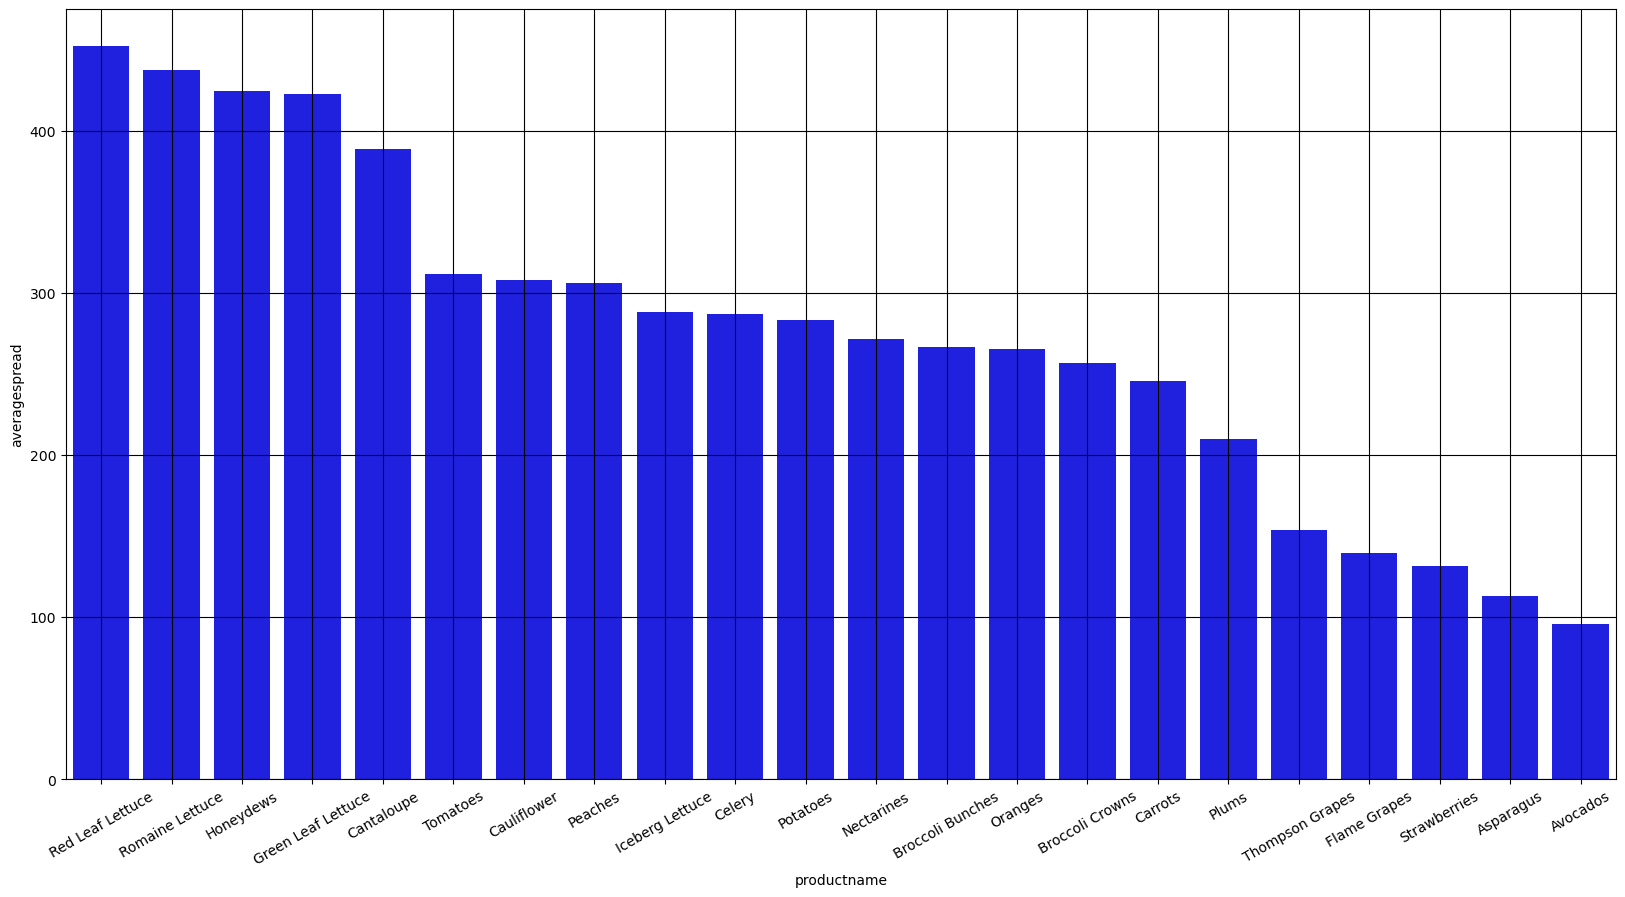

In [16]:
##ascending bar graph of the most spread to least spread veggie
plt.figure(figsize=(20,10));
fig1 = sns.barplot(data=expensive_veggies,x="productname", y="averagespread", color="blue");
fig1.set_xticklabels(labels=expensive_veggies["productname"], rotation=30);
plt.grid(color = "black")